In [124]:
import pandas as pd

In [125]:
data = pd.read_csv('sport_data.csv')
data

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball
5,18,5,Male,Basketball
6,15,3,Male,Hockey
7,13,3,Male,Hockey
8,13,4,Male,Hockey
9,13,3,Female,Soccer


In [126]:
data['Sex'] = data['Sex'].map({'Female': 0, 'Male': 1})
data

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball
5,18,5,1,Basketball
6,15,3,1,Hockey
7,13,3,1,Hockey
8,13,4,1,Hockey
9,13,3,0,Soccer


In [137]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [128]:
X = data[['Age', 'Height', 'Sex']]
y = data[['Sport']]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [130]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [131]:
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.8

In [132]:
matrix = confusion_matrix(y_test, pred)
matrix

array([[2, 0, 0],
       [0, 2, 0],
       [0, 1, 0]], dtype=int64)

In [133]:
report = classification_report(y_test, pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         2
      Hockey       0.67      1.00      0.80         2
      Soccer       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



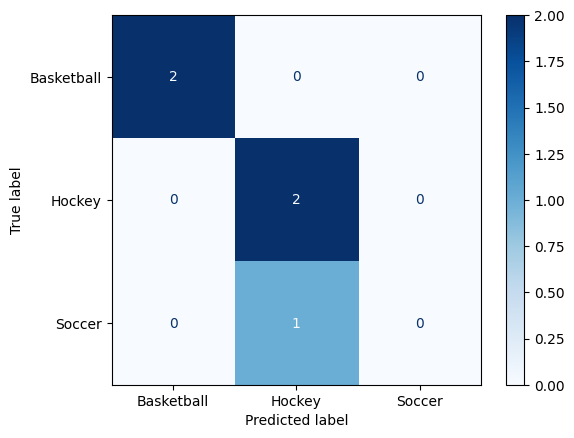

In [139]:
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
)
disp.confusion_matrix

plt.show()

In [135]:
from joblib import dump, load
dump(model, 'models/model.joblib')

['models/model.joblib']